# API Demo
This notebook demonstrates usage of the craterfind API using a minimal python app. The first cell contains the code that will do the necessary things.

In [1]:
import json
import subprocess
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.patches import Circle

def load_image(path='./data/0.png'):
    img = (imread(path)*255).astype(np.uint8)
    return img

def prepare_image(img):
    img = img.flatten()
    return img

def prepare_request(array):
    base_url = "http://localhost:8501/detect/"
    data = {
        "instances":[array.tolist()]
    }
    data_json = json.dumps(data)
    with open('./_tmp.json', 'w') as f:
        f.write(data_json)
    formatted = f"curl -d '@./_tmp.json' -X POST {base_url}"
    return formatted

def make_request(request_string, delete_tmp=True):
    response = subprocess.check_output(request_string, shell=True).decode()
    if delete_tmp:
        os.remove('./_tmp.json')
    response_data = eval(response)
    return response_data
    

def plot_prediction(img, prediction):
    x,y,r = prediction
    fig, ax = plt.subplots(1)
    prediction = Circle(xy=(x,y), radius=r, fill=False)
    ax.add_artist(prediction)
    ax.imshow(img, cmap='Greys_r')

# Start with an Image
The model only takes pixels as an input. The annotator-provided crater location is implied to be in the center of the input image. This POC just deals with images of 32x32 pixels, like the following:

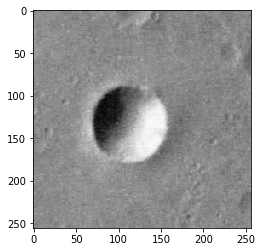

In [2]:
#randomly select an image from test data
n = np.random.randint(5)
#load image and convert to integer pixel values
img = load_image(f'./data/256_{n}.png')
plt.imshow(img, cmap='Greys_r');

# Transform Pixels
The raw pixel data needs to be flattened into a single vector.

In [3]:
#this function does the transformation
array = prepare_image(img)

#inspect resulting data:
print("Shape of image data: ", array.shape)

Shape of image data:  (65536,)


# Form Request
The API can be hit with a POST request and json body. The curl format would be:

`curl -d '{"instances":[[pixels]]}' -X POST http://localhost:<ip>/detect`

This is done here:

In [4]:
curl_request = prepare_request(array)

The json is saved to a temporary file to avoid forming an overly-long command; before running the next cell, you can see the contents of that file in `./_tmp.json` (which will be deleted after this script makes the request).

# Send Request, Parse Response

In [5]:
response = make_request(curl_request)
#response contains x, y, and r predictions for crater.
print(response)

{'predictions': [121.39680802499998, 132.9733102625, 46.88532502375]}


# Plot Prediction

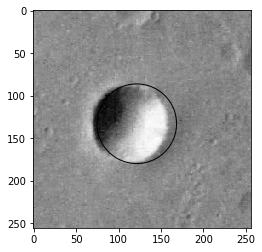

In [6]:
prediction = response['predictions']
plot_prediction(img, prediction)